In [2]:
# 패키지 불러오기

import pandas             as pd          # 데이터 읽어오기/저장하기, 데이터 핸들링
import numpy              as np          # 수학, 선형대수학
import seaborn            as sns         # 데이터 시각화(고수준)
import matplotlib.pyplot  as plt         # 데이터 시각화(저수준)
import scipy.stats        as stats       # 통계, 수학
import sweetviz           as sv          # EDA 보고서
from   statsmodels.formula.api import ols # 회귀분석

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
# HDD에 있는 pickle 데이터를 메모리(RAM)에 올리는 기능
data = pd.read_pickle("d:/novelis/ds2023/diamonds_230830.pickle")

In [5]:
# (2) 다름(퍼짐, 산포) : 데이터 분석의 핵심
# 범위, 사분위 범위, 표준편차, 중위수절대편차

In [6]:
# i. 범위(Range) : 최대값(Max) - 최소값(Min)
# data.수치형 데이터.max() - data.수치형데이터.min() 
diamonds.carat.max() - diamonds.carat.min()

4.81

In [7]:
# ii. 사분위범위(IQR: Inter Quartile Range) : Q3 - Q1 
# scipy.stats.iqr(data.수치형데이터)
stats.iqr(data.carat)

0.64

In [8]:
# iii. 표준편차(SD: Standard Deviation)
# 중심(대표값)과 얼마나 다를까? 
# 평균과 얼마나 다를까? 
# 참고로 표준편차는 이상치의 영향을 많이 받기 떄문에 위험한 값

# data.수치형데이터.std()
diamonds.carat.std()

0.4740112444054184

In [9]:
# iv. 중위수절대편차(MAD: Median Absolute Deviation)
# 중심(대표값)과 얼마나 다를까?
# 중위수와 얼마나 다를까?

#scipy.stats.median_abs_deviation(data.수치형데이터)
stats.median_abs_deviation(diamonds.carat)

0.32000000000000006

In [10]:
# (3) 분포의 모양: 왜도, 첨도 
# i.왜도(Skewness): 기울어진 정도, 대칭 여부 파악
# scipy.stats.skew(data.수치데이터)
stats.skew(diamonds.carat)

1.1166148681277797

In [11]:
# ii.첨도(Kurtosis): 중심이 얼마나 뾰족한가? 중심에 얼마나 몰려 있는가? 
# scipy.stats.kurtosis(data.수치형데이터)
stats.kurtosis(diamonds.carat)

1.2564076184374766

In [12]:
# data.수치형데이터.describe()
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [13]:
# count : 데이터의 개수 : n

# 참고 : 데이터의 개수 
# N : 모집단(Population)의 데이터의 개수
# n : 표본(sample)의 데이터의 개수

# 모집단 : 관심 있는 대상의 전체

# 25% : Q1 : first Quartile : 제 1 사분위수
# 50% : Median : Q2
# 75% : Q3 : third Quartile : 제 3 사분위수

In [14]:
# scipy.stats.descrieb(data.수치형데이터)
stats.describe(diamonds.carat)

DescribeResult(nobs=53940, minmax=(0.2, 5.01), mean=0.7979397478680014, variance=0.22468665982277336, skewness=1.1166148681277797, kurtosis=1.2564076184374766)

In [15]:
# variance : 분산, 표준 편차의 제곱 
# 평균과 얼마나 다를까를 알려줌, 단위 문제가 있음

### 3. 범주형 데이터의 분석: 2개의 열
- 표 = 교차표
- 데이터 시각화 : 누적막대그래프

In [16]:
# 범주형 데이터 : 1개 : X : 독립변수, Feature 
# 범주형 데이터 : 1개 : Y : 종속변수, Label or Target

In [17]:
# 범주형 데이터 : cut   : X
# 범주형 데이터 : color : Y 

In [18]:
# 3.1 표 = 교차표(Cross Table)
# 빈도, 전체 백분율, 행 백분율, 열 백분율

In [19]:
# (1) 빈도(Frequency)
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True)

In [20]:
pd.crosstab(index = diamonds.cut,
           columns = diamonds.color,
           margins = True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896,21551
Premium,1603,2337,2331,2924,2360,1428,808,13791
Very Good,1513,2400,2164,2299,1824,1204,678,12082
Good,662,933,909,871,702,522,307,4906
Fair,163,224,312,314,303,175,119,1610
All,6775,9797,9542,11292,8304,5422,2808,53940


In [21]:
# (2) 전체 백분율 : (빈도/전체 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = True)*100

In [22]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = True)*100

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,5.253986,7.235818,7.093066,9.054505,5.774935,3.880237,1.661105,39.953652
Premium,2.971821,4.332592,4.321468,5.420838,4.375232,2.647386,1.497961,25.567297
Very Good,2.804968,4.449388,4.011865,4.262143,3.381535,2.232110,1.256952,22.398962
Good,1.227290,1.729700,1.685206,1.614757,1.301446,0.967742,0.569151,9.095291
Fair,0.302188,0.415276,0.578420,0.582128,0.561735,0.324435,0.220615,2.984798
All,12.560252,18.162773,17.690026,20.934372,15.394883,10.051910,5.205784,100.000000


In [23]:
# Ideal & G : 9.1% 
# Ideal & F : 7.1%

# 질문 : 두 백분율의 차이는 얼마인가요?
# 2%p 차이가 나요
# %p: Percent Point : 백분율과 백분율의 차이 

In [24]:
# (3) 행 백분율 : (빈도/각 행의 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = "index")*100

In [25]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = "index")*100

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,13.150202,18.110529,17.753237,22.662521,14.454086,9.711846,4.157580
Premium,11.623523,16.945834,16.902328,21.202233,17.112610,10.354579,5.858893
Very Good,12.522761,19.864261,17.910942,19.028307,15.096838,9.965238,5.611654
Good,13.493681,19.017530,18.528333,17.753771,14.309009,10.640033,6.257644
Fair,10.124224,13.913043,19.378882,19.503106,18.819876,10.869565,7.391304
All,12.560252,18.162773,17.690026,20.934372,15.394883,10.051910,5.205784


In [26]:
# (3) 열 백분율 : (빈도/각 열의 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = "columns")*100

In [27]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = "columns")*100

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,41.830258,39.838726,40.096416,43.251860,37.512042,38.601992,31.908832,39.953652
Premium,23.660517,23.854241,24.428841,25.894439,28.420039,26.337145,28.774929,25.567297
Very Good,22.332103,24.497295,22.678684,20.359547,21.965318,22.205828,24.145299,22.398962
Good,9.771218,9.523323,9.526305,7.713425,8.453757,9.627444,10.933048,9.095291
Fair,2.405904,2.286414,3.269755,2.780730,3.648844,3.227591,4.237892,2.984798


In [28]:
# (2) 데이터 시각화: 누적막대그래프
# result = 행백분율의 결과 
# result.plot.bar(stacked = False)
# plt.legend(bbox_to_anchor = (1,1))
# plt.show()

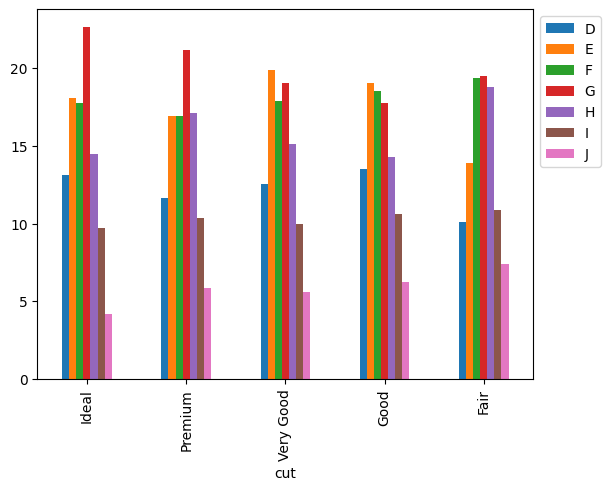

In [29]:
result = pd.crosstab(index    = diamonds.cut,
                     columns   = diamonds.color,
                     normalize = "index")*100

result.plot.bar(stacked = False)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

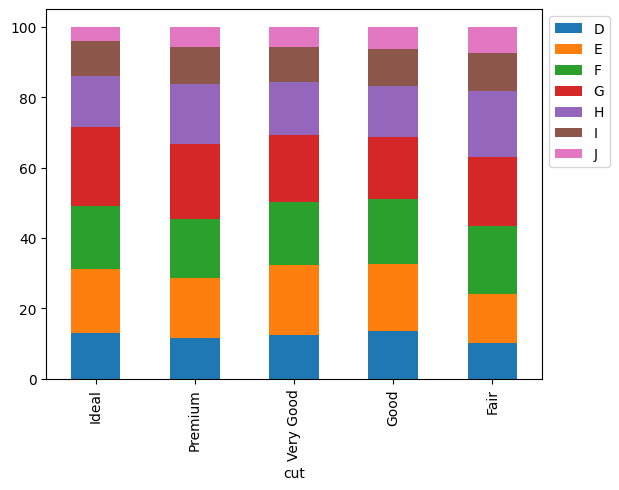

In [30]:
result = pd.crosstab(index    = diamonds.cut,
                     columns   = diamonds.color,
                     normalize = "index")*100

result.plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

### 4. 범주별 수치형 데이터의 분석: 2개의 열
- 범주별 데이터 시각화
- 범주별 기술통계량

In [31]:
# 범주형 데이터 : 1개 : X : 독립변수, Feature          : cut
# 수치형 데이터 : 1개 : Y : 종속변수, Label or Target  : carat

In [32]:
# 4.1 범주별 데이터 시각화
# 히스토그램, 상자그림, 바이올린

In [33]:
# (1) 범주별 히스토그램 
# seaborn.histplot(data = , x = 수치형데이터, hue = 범주형데이터)
# plt.show()

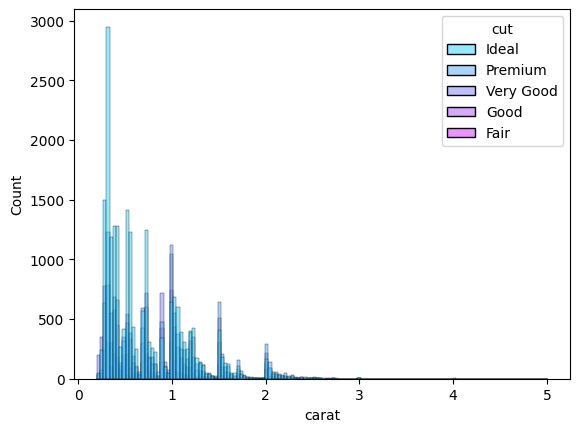

In [34]:
sns.histplot(data = diamonds,
             x = "carat",
             hue = "cut",
             palette="cool")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


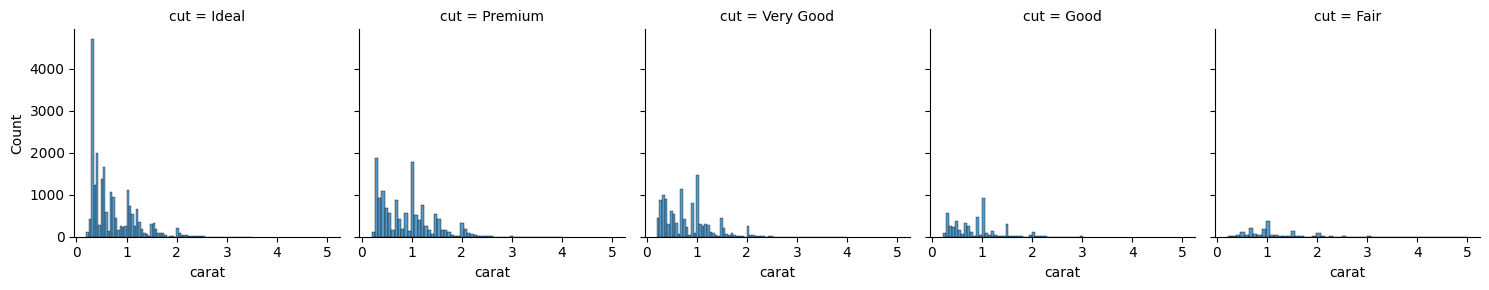

In [35]:
# seaborn.Facet(data. col = "범주형데이터")
g = sns.FacetGrid(diamonds, col = "cut")

# g.map(sns.scatterplot. "수치형데이터")
g.map(sns.histplot, "carat")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


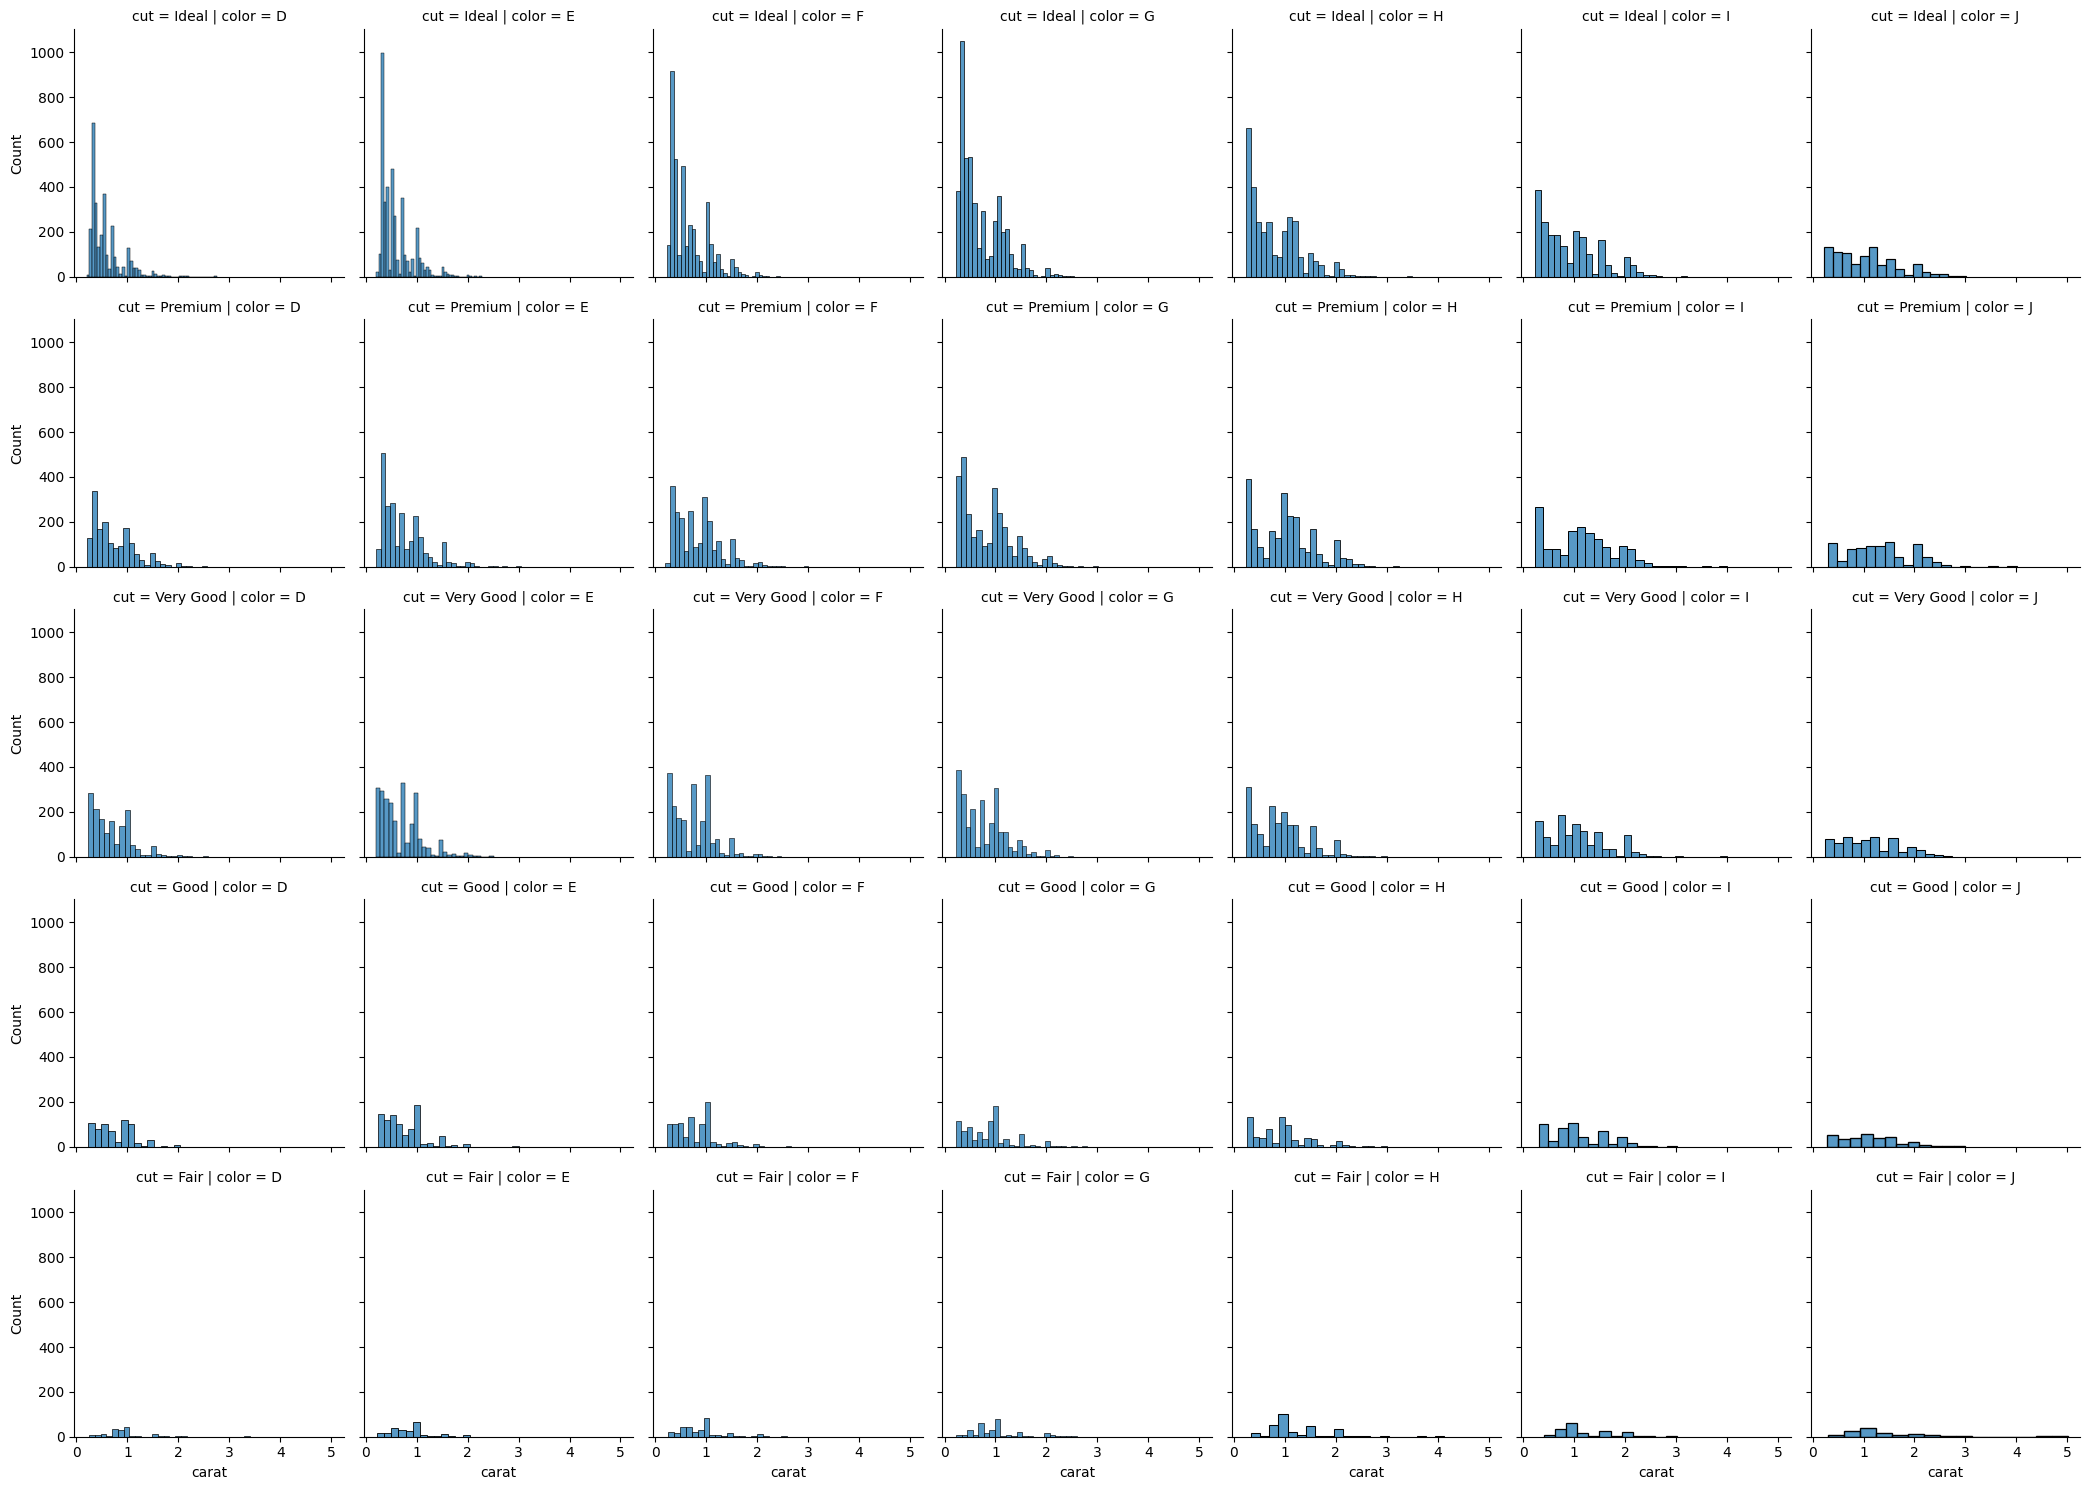

In [36]:
# seaborn.Facet(data. col = "범주형데이터")
g = sns.FacetGrid(diamonds, row = "cut", col = "color")

# g.map(sns.scatterplot. "수치형데이터")
g.map(sns.histplot, "carat")
plt.show()

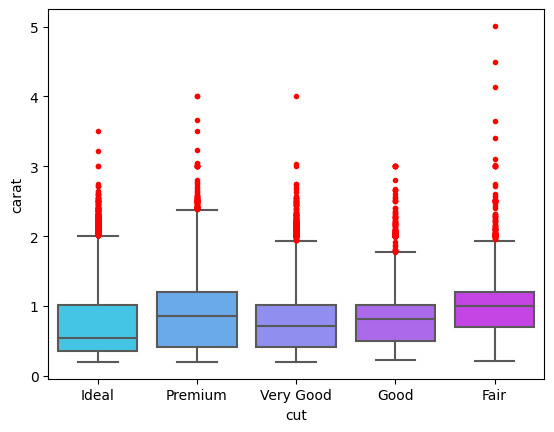

In [37]:
# (2) 범주별 상자그림
# seaborn.boxplot(data = , y = "수치형데이터", x = "범주형데이터")
# plt.show()


flierprops = dict(marker ="o",
                  markerfacecolor = "r",
                  markersize = 3,
                  linestyle = "none",
                  markeredgecolor = "r")  # 이상치에 적용할 스타일


sns.boxplot(data = diamonds, y = "carat", x = "cut",
            palette = "cool",
            flierprops = flierprops)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


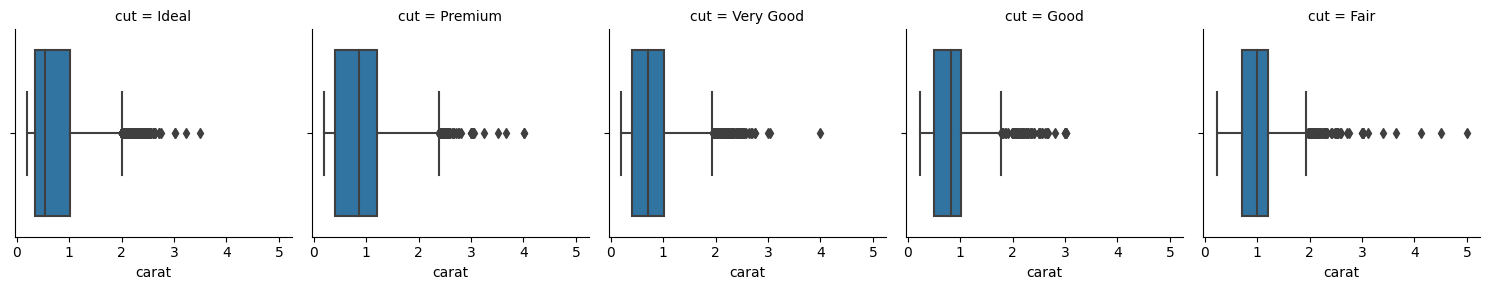

In [38]:
g = sns.FacetGrid(diamonds, col = "cut")
g.map(sns.boxplot, "carat")

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


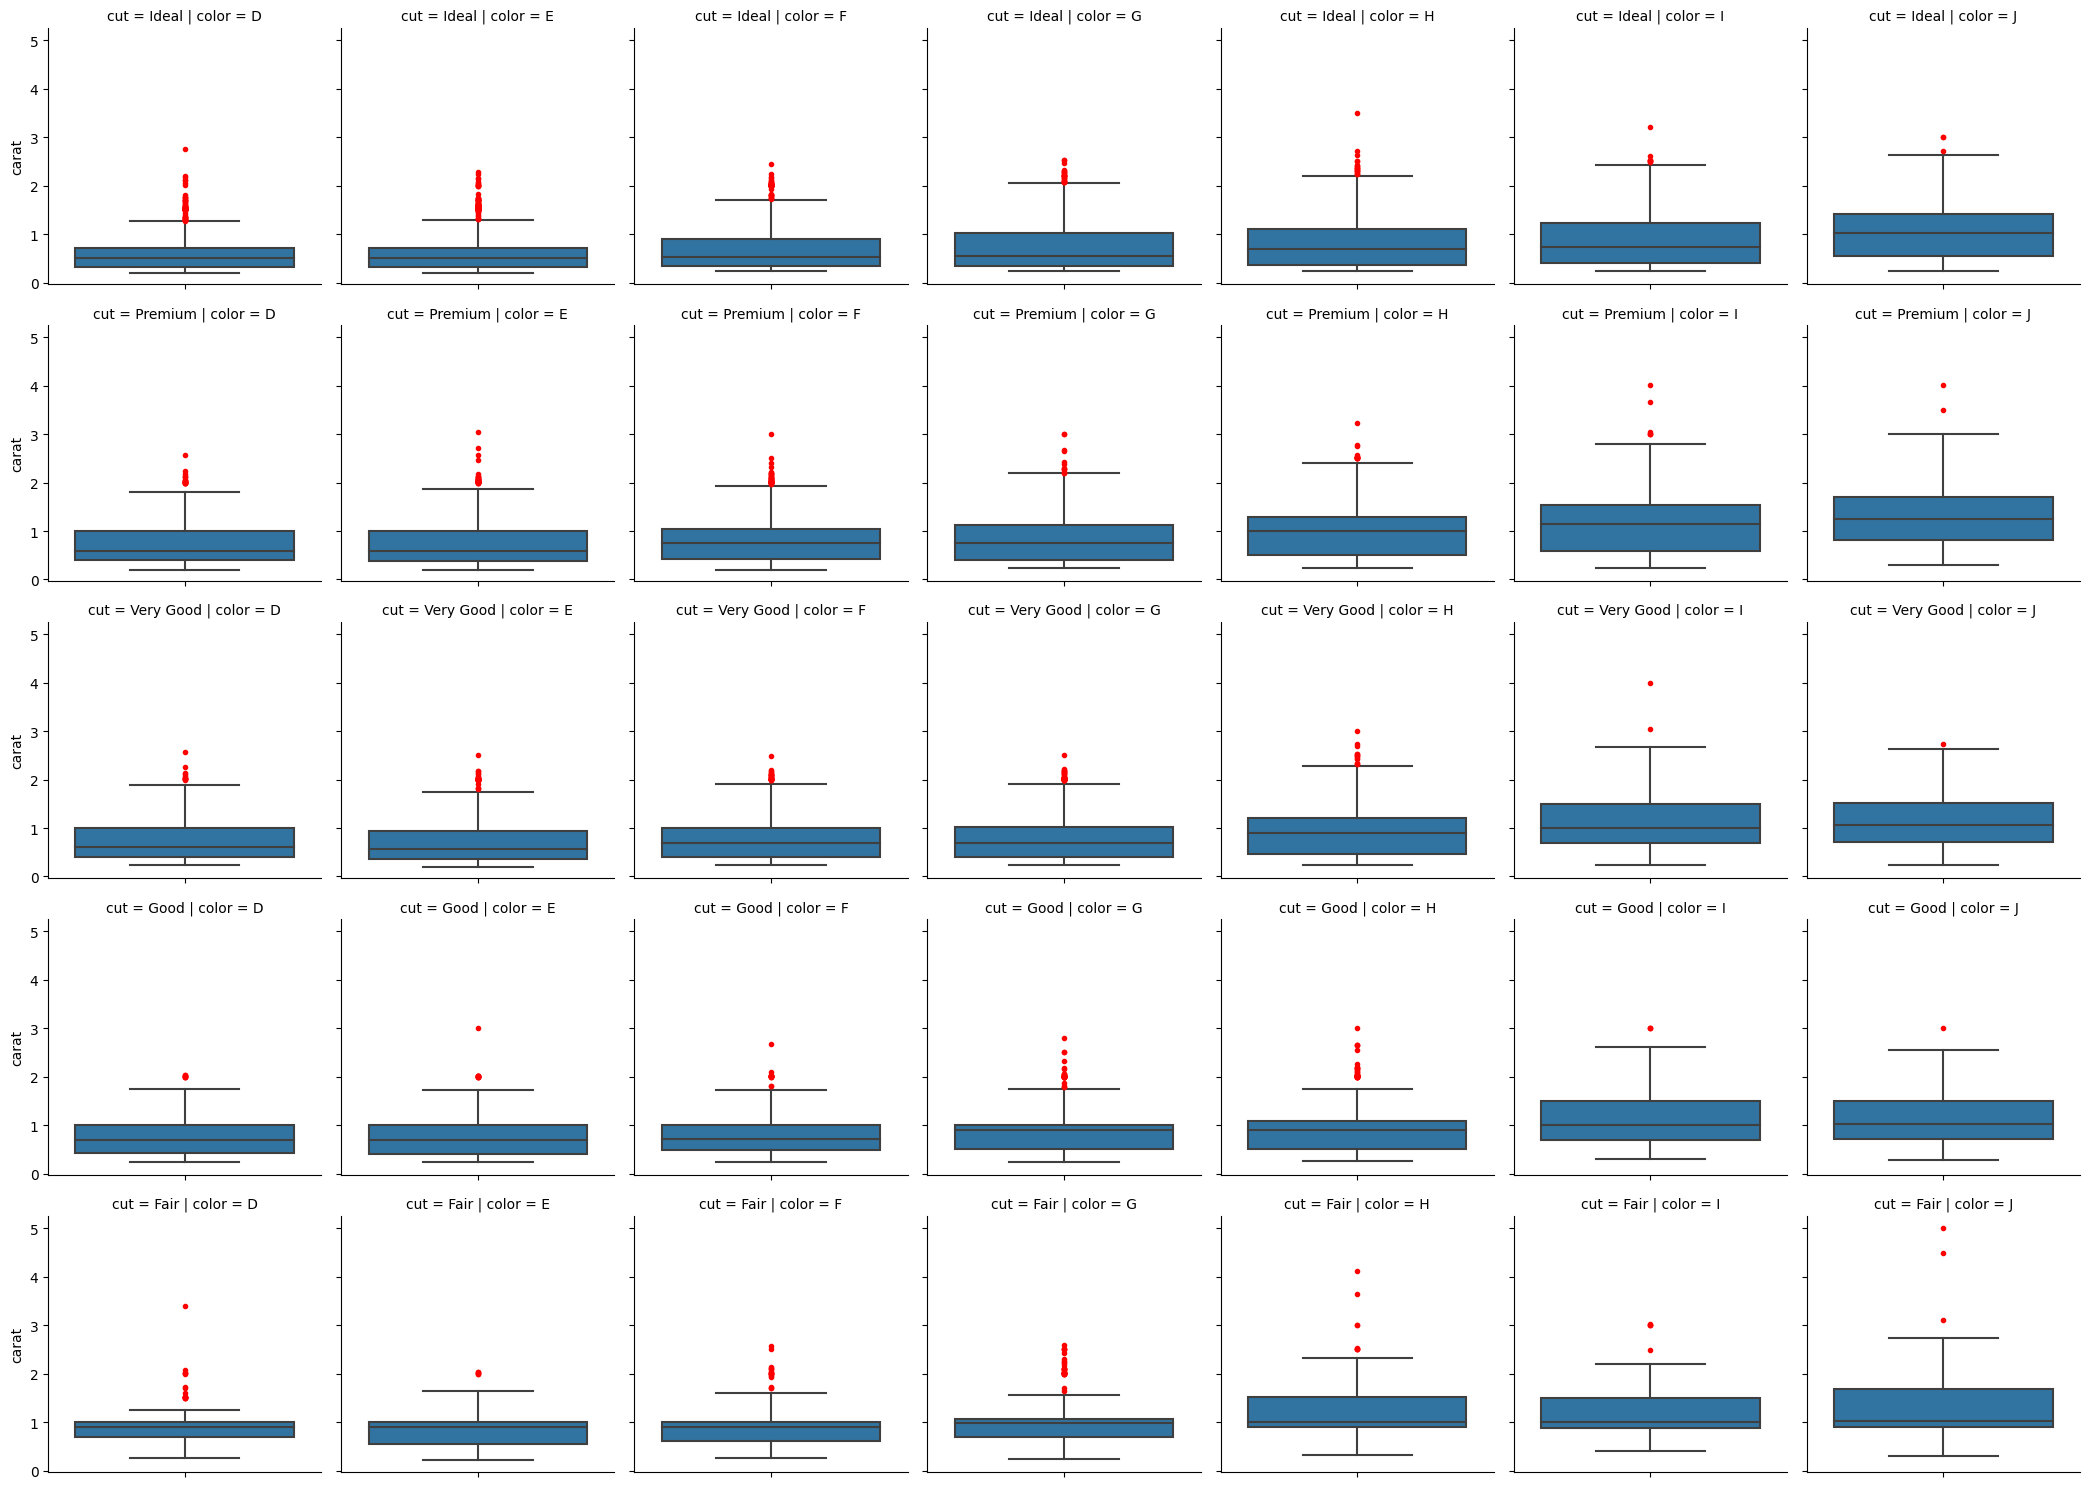

In [39]:
g = sns.FacetGrid(diamonds, row = "cut", col = "color")
g.map_dataframe(sns.boxplot, 
                y = "carat",
                flierprops = flierprops)

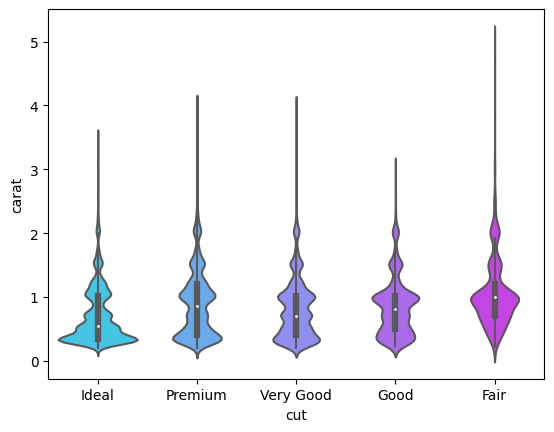

In [40]:
# (3) 범주별 바이올린
# seaborn.violinplot(data = , y = "수치형데이터", x = "범주형데이터")
# plt.show()

sns.violinplot(data = diamonds, y = "carat", x = "cut",
            palette = "cool")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


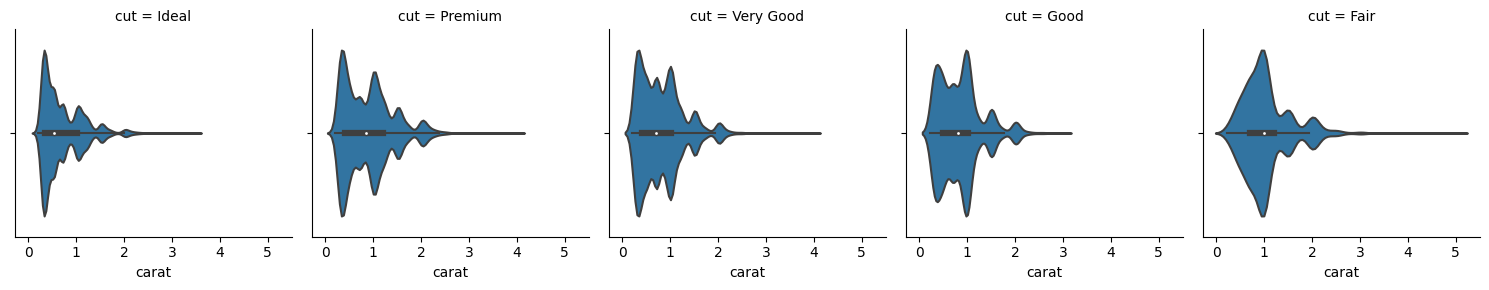

In [41]:
g = sns.FacetGrid(diamonds, col = "cut")
g.map(sns.violinplot, "carat")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


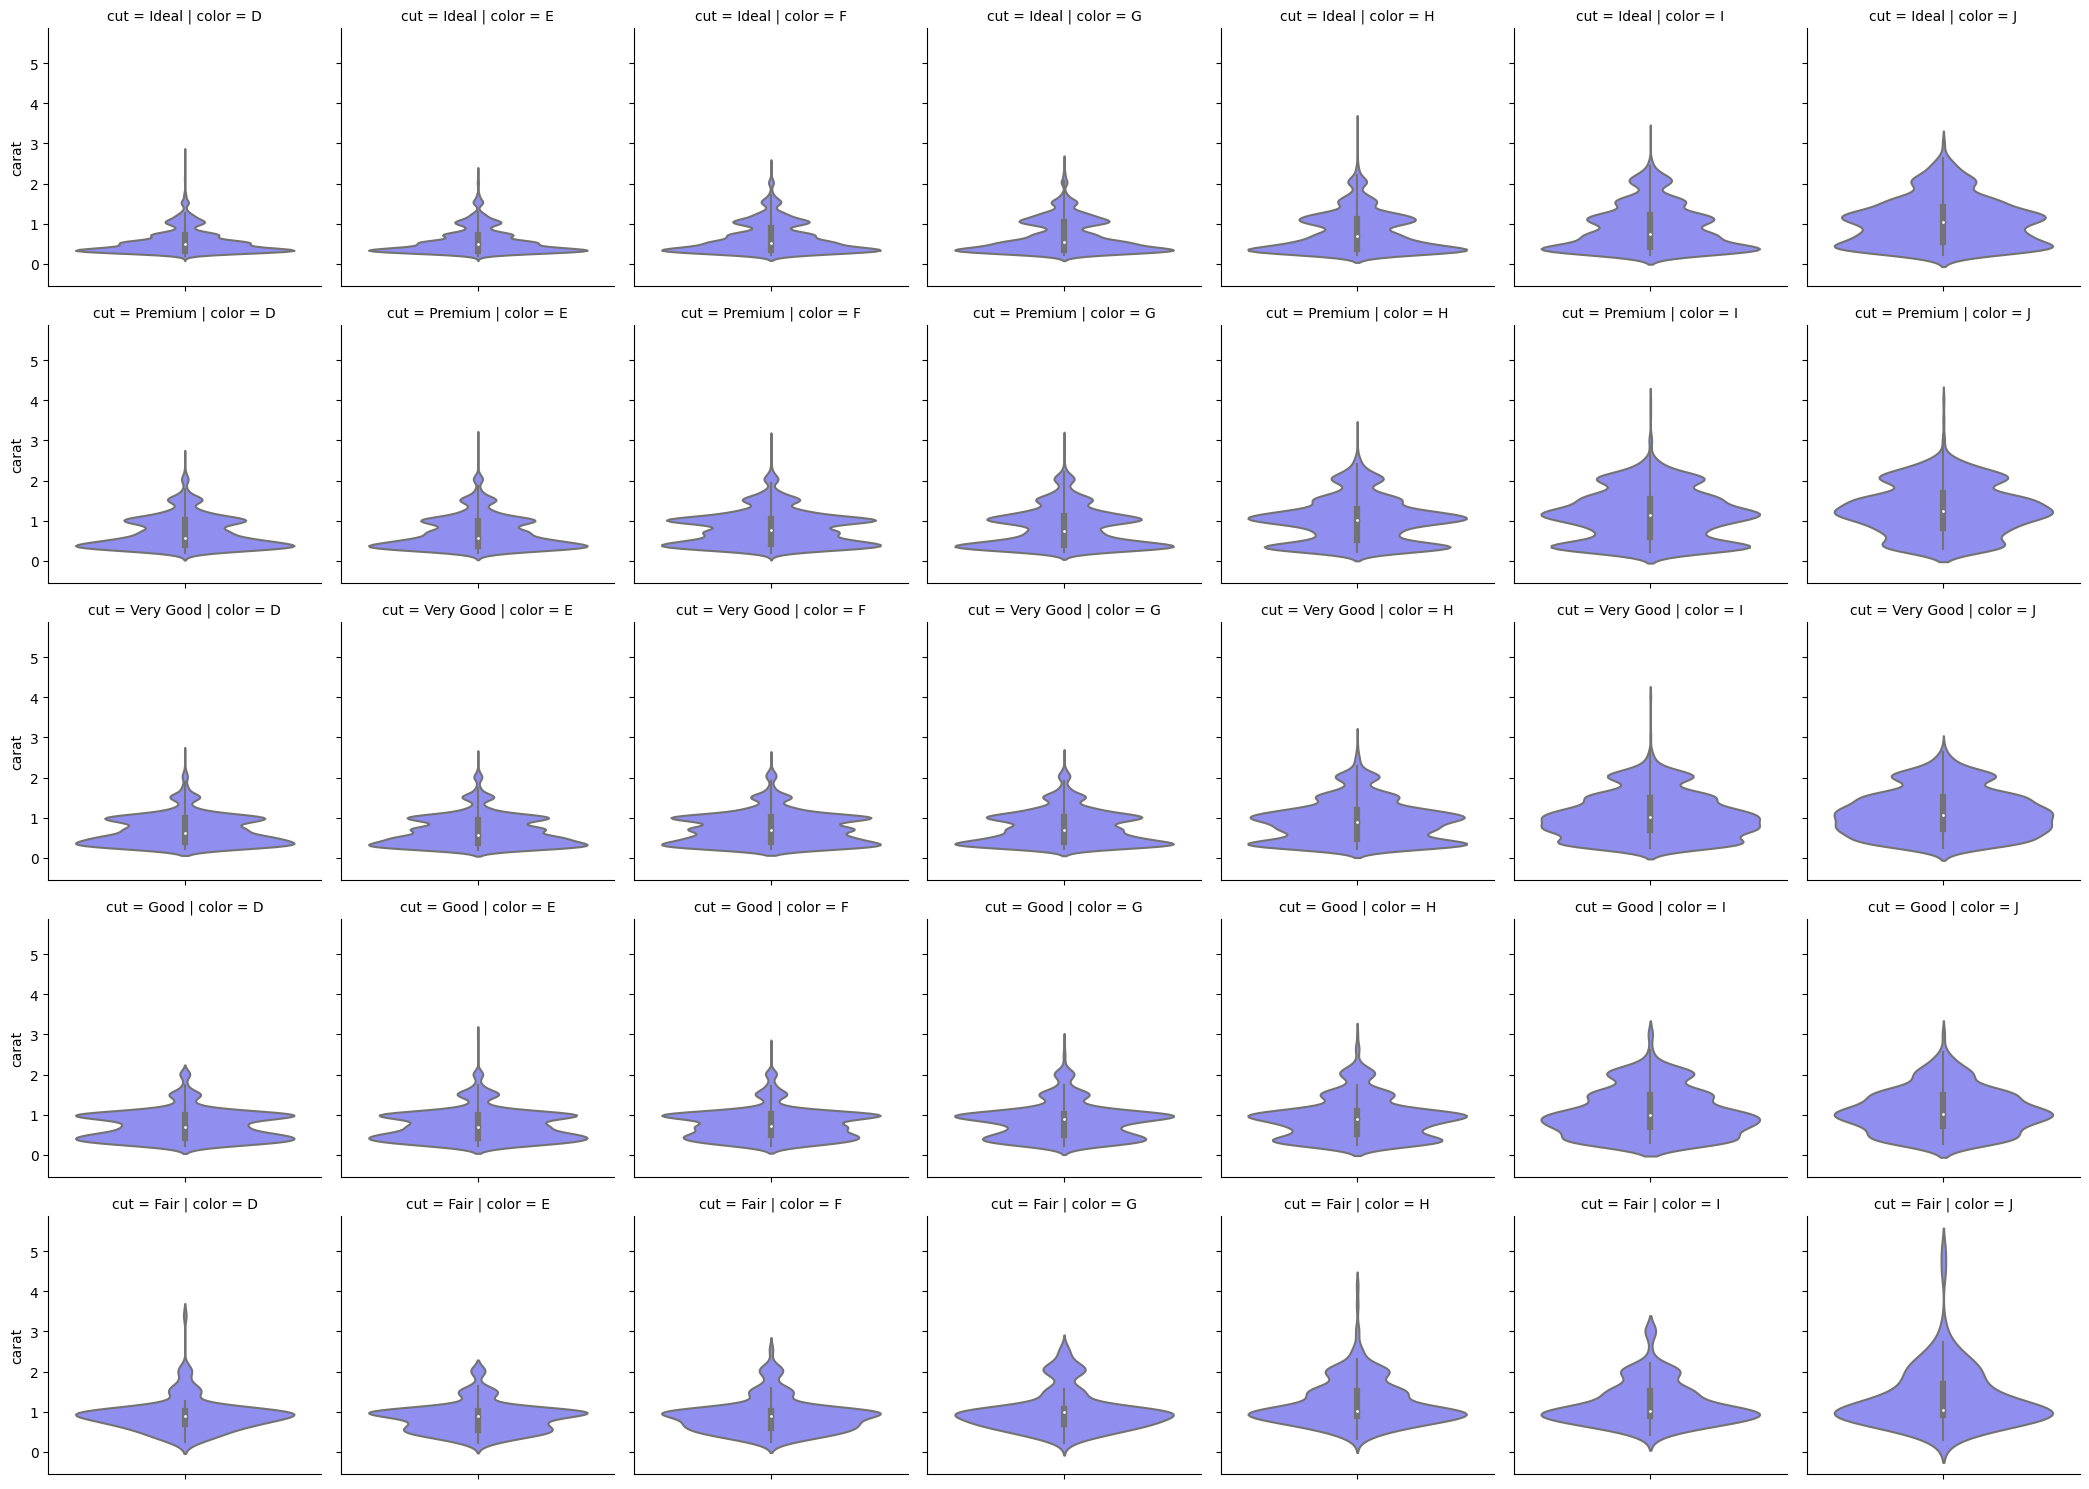

In [42]:
g = sns.FacetGrid(diamonds, row = "cut", col = "color")
g.map_dataframe(sns.violinplot, 
                y = "carat",
                palette = "cool")
plt.show()

In [43]:
# 4.2 범주별 기술통계량 
# data.groupby("범주형데이터").수치형데이터.기술통계량함수()

 #범주별 평균
diamonds.groupby(["cut"]).carat.mean()

cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

In [44]:
 #범주별 표준편차
diamonds.groupby(["cut"]).carat.std()

cut
Ideal        0.432876
Premium      0.515262
Very Good    0.459435
Good         0.454054
Fair         0.516404
Name: carat, dtype: float64

In [45]:
 #범주별 기술통계량
diamonds.groupby(["cut"]).carat.describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21551.0,0.702837,0.432876,0.20,0.35,0.54,1.01,3.50
Premium,13791.0,0.891955,0.515262,0.20,0.41,0.86,1.20,4.01
Very Good,12082.0,0.806381,0.459435,0.20,0.41,0.71,1.02,4.00
Good,4906.0,0.849185,0.454054,0.23,0.50,0.82,1.01,3.01
Fair,1610.0,1.046137,0.516404,0.22,0.70,1.00,1.20,5.01


In [46]:
# 범주별 다름을 비교 : CV(Coefficient of Variation) = 변동계수
# 표준편차/평균

diamonds.groupby(["cut"]).carat.std() / diamonds.groupby(["cut"]).carat.mean()

cut
Ideal        0.615899
Premium      0.577677
Very Good    0.569749
Good         0.534695
Fair         0.493630
Name: carat, dtype: float64

In [47]:
# CV 가장 크면 해당 범주가 가장 data가 다르다고 해석
# Ideal(0.62) > Premium(0.58) > Very Good(0.57) > Good(0.53) > Fair(0.49)

In [48]:
# 범주형 데이터 : 2개 : cut, color 
diamonds.groupby(["cut", "color"]).carat.describe()

count      mean       std   min     25%    50%     75%   max
cut       color                                                               
Ideal     D      2834.0  0.565766  0.299350  0.20  0.3300  0.500  0.7100  2.75
          E      3903.0  0.578401  0.312541  0.20  0.3300  0.500  0.7200  2.28
          F      3826.0  0.655829  0.374525  0.23  0.3500  0.530  0.9000  2.45
          G      4884.0  0.700715  0.410618  0.23  0.3400  0.540  1.0300  2.54
          H      3115.0  0.799525  0.486874  0.23  0.3600  0.700  1.1100  3.50
          I      2093.0  0.913029  0.553728  0.23  0.4100  0.740  1.2200  3.22
          J       896.0  1.063594  0.582100  0.23  0.5400  1.030  1.4100  3.01
Premium   D      1603.0  0.721547  0.397464  0.20  0.4000  0.580  1.0100  2.57
          E      2337.0  0.717745  0.409785  0.20  0.3800  0.580  1.0000  3.05
          F      2331.0  0.827036  0.420196  0.20  0.4300  0.760  1.0400  3.01
          G      2924.0  0.841488  0.479534  0.23  0.4000  0.755  1.1200  3.01
          H      2360.0  1.016449  0.544078  0.23  0.5100  1.010  1.3000  3.24
          I      1428.0  1.144937  0.613604  0.23  0.5900  1.140  1.5400  4.01
          J       808.0  1.293094  0.613709  0.30  0.8100  1.250  1.7000  4.01
Very Good D      1513.0  0.696424  0.369229  0.23  0.4000  0.610  1.0000  2.58
          E      2400.0  0.676317  0.377914  0.20  0.3700  0.570  0.9400  2.51
          F      2164.0  0.740961  0.388883  0.23  0.4000  0.700  1.0100  2.48
          G      2299.0  0.766799  0.418016  0.23  0.4000  0.700  1.0200  2.52
          H      1824.0  0.915948  0.502947  0.23  0.4675  0.900  1.2000  3.00
          I      1204.0  1.046952  0.551984  0.24  0.7000  1.005  1.5000  4.00
          J       678.0  1.133215  0.555920  0.24  0.7100  1.060  1.5100  2.74
Good      D       662.0  0.744517  0.363117  0.23  0.4200  0.700  1.0000  2.04
          E       933.0  0.745134  0.380890  0.23  0.4100  0.700  1.0000  3.00
          F       909.0  0.775930  0.370014  0.23  0.4900  0.710  1.0100  2.67
          G       871.0  0.850896  0.432718  0.23  0.5000  0.900  1.0100  2.80
          H       702.0  0.914729  0.497716  0.25  0.5100  0.900  1.0900  3.01
          I       522.0  1.057222  0.575637  0.30  0.7000  1.000  1.5000  3.01
          J       307.0  1.099544  0.537125  0.28  0.7100  1.020  1.5000  3.00
Fair      D       163.0  0.920123  0.405419  0.25  0.7000  0.900  1.0100  3.40
          E       224.0  0.856607  0.364585  0.22  0.5525  0.900  1.0100  2.04
          F       312.0  0.904712  0.418890  0.25  0.6000  0.900  1.0100  2.58
          G       314.0  1.023822  0.492724  0.23  0.7000  0.980  1.0675  2.60
          H       303.0  1.219175  0.548239  0.33  0.9000  1.010  1.5100  4.13
          I       175.0  1.198057  0.521978  0.41  0.8850  1.010  1.5050  3.02
          J       119.0  1.341176  0.733971  0.30  0.9050  1.030  1.6850  5.01

In [49]:
# 범주형 데이터 : 3개 : cut, color, clarity 
diamonds.groupby(["cut", "color", "clarity"]).carat.mean()

cut    color  clarity
Ideal  D      IF         0.615714
              VVS1       0.460139
              VVS2       0.544789
              VS1        0.533504
              VS2        0.499293
                           ...   
Fair   J      VS1        1.229375
              VS2        1.032609
              SI1        1.181071
              SI2        1.316667
              I1         1.993478
Name: carat, Length: 280, dtype: float64

### 5. 수치형 데이터의 분석: 2개의 열
- 상관 관계의 시각화 
- 상관 관계의 수치화

In [50]:
# 수치형 데이터 : 1개 : X : 독립변수, Feature
# 수치형 데이터 : 1개 : Y : 종속변수, Label or Target

In [51]:
# 상관관계(Corrlation) : 직선의 관계, 선형의 관계

In [52]:
# 5.1 상관관계의 시각화
# 산점도, 산점행렬도

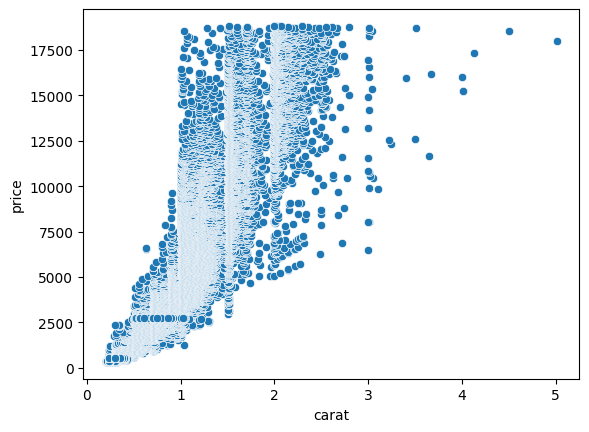

In [53]:
# (1) 산점도(Scatter plot)  : carat, price
# seaborn.scatterplot(data = , x = "수치형데이터(x)", y = "수치형데이터(y)")
# plt.show() 

sns.scatterplot(data = diamonds,
                x = "carat", 
                y = "price")
plt.show()

In [54]:
# 수치형 데이터 : carat, depth, table, x, y, z, price(Y)
# X : carat, depth, table, x, y, z
# Y : price

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


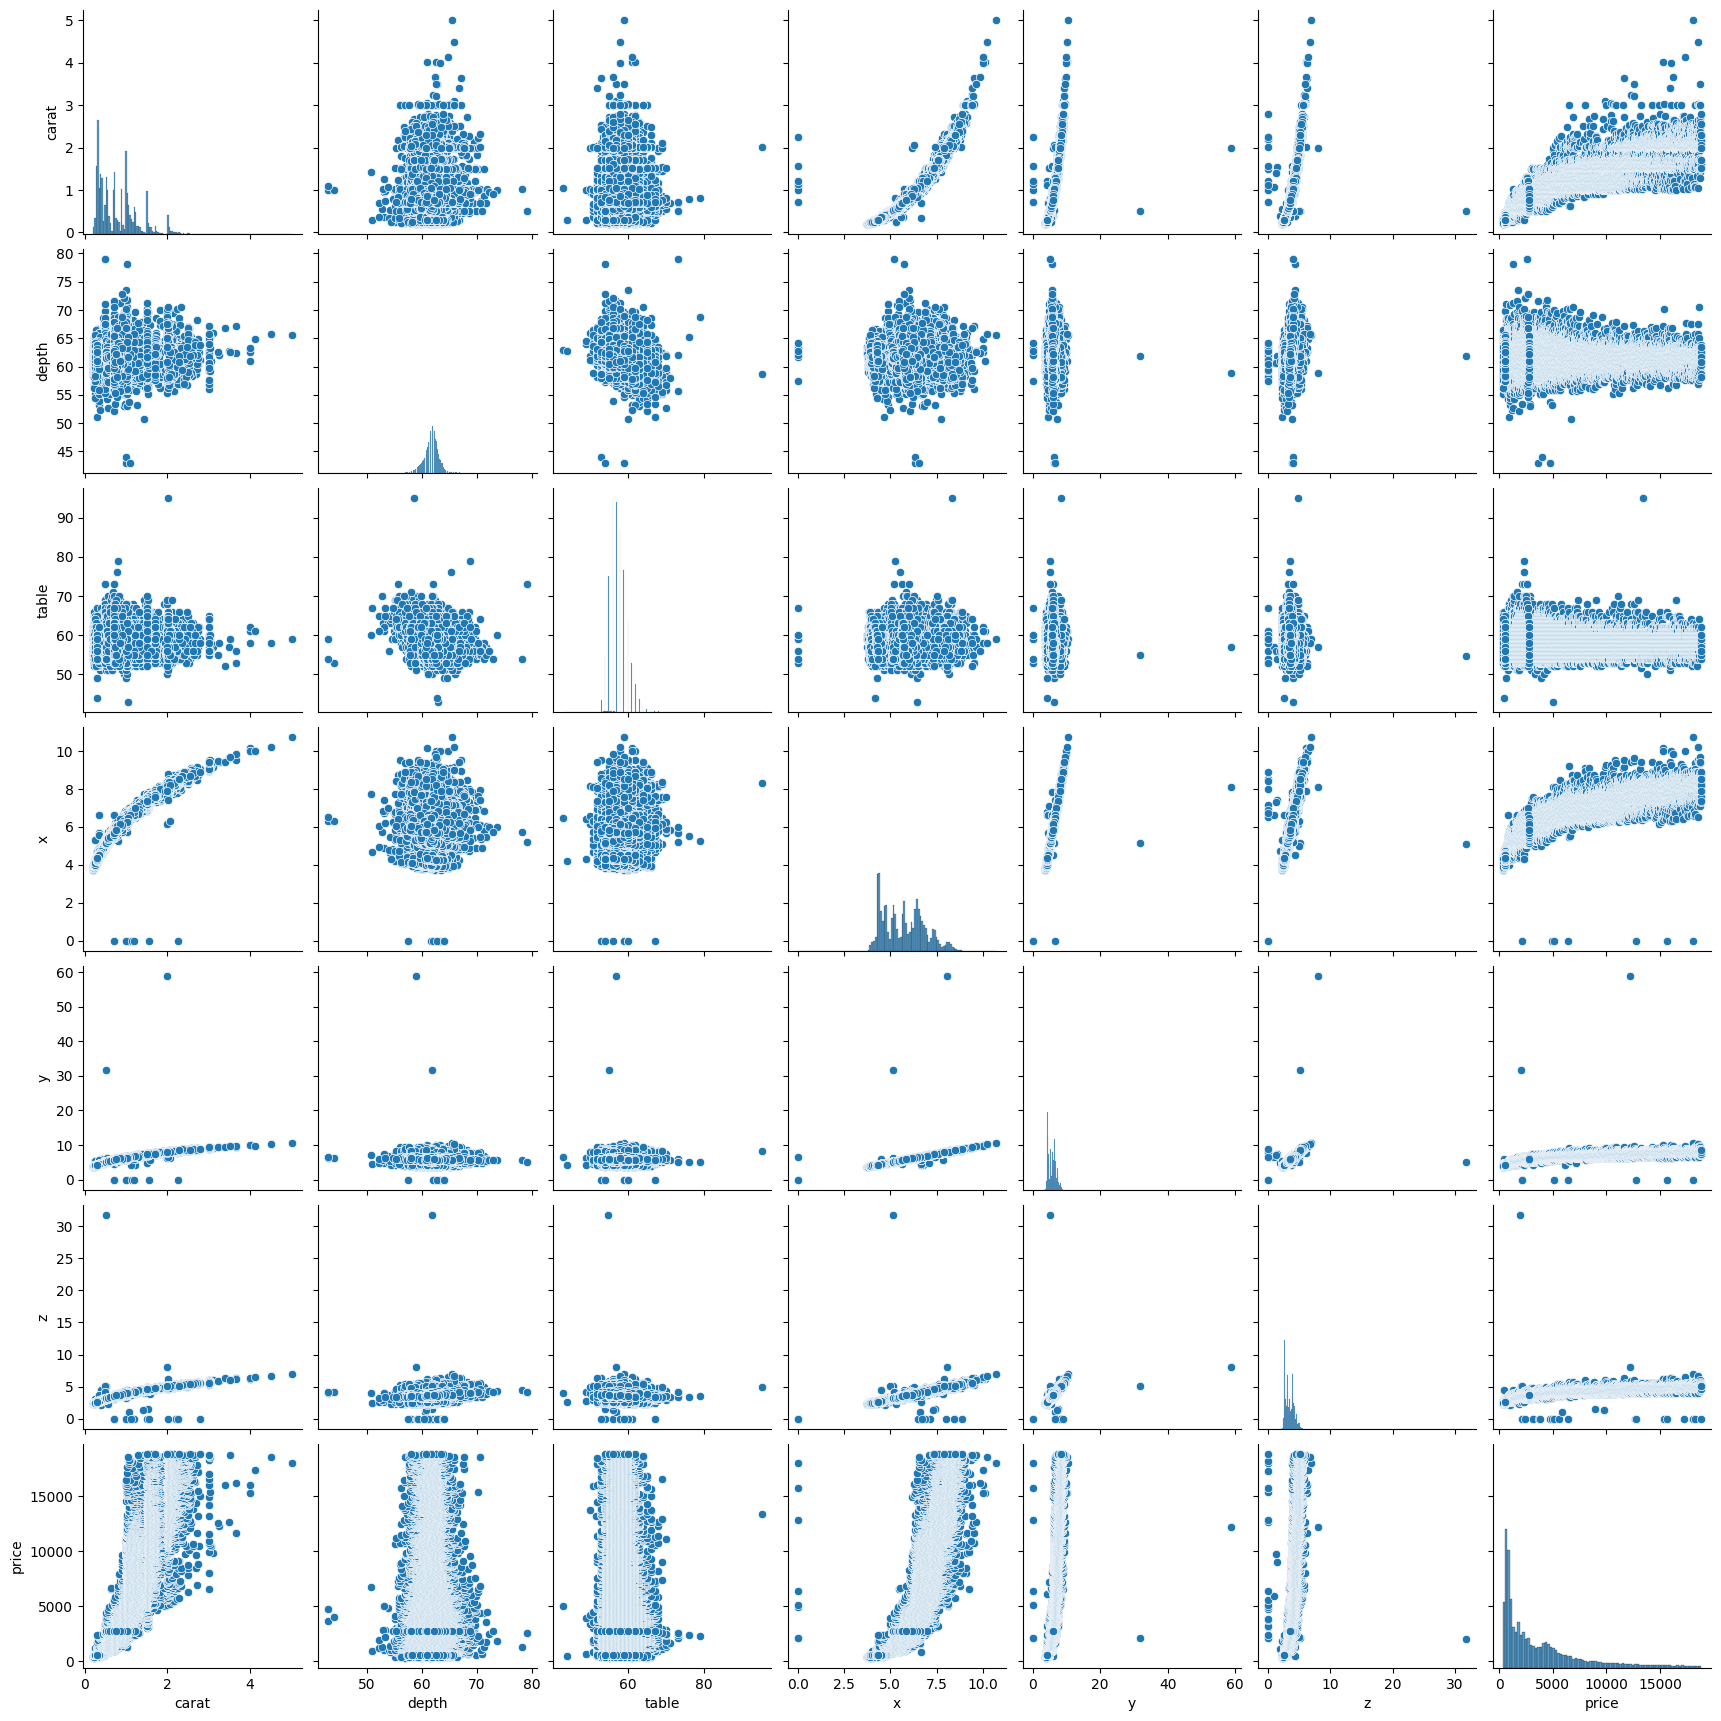

In [55]:
# (2) 산점행렬도(SPM: Scatter Plot Matrix)
# data : 수치형 데이터로만 이루어져 있어야 함
# seaborn.pairplot(data)
# plt.show()

diamonds2 = diamonds.loc[:, ["carat", "depth", "table", "x", "y", "z", "price"]]
sns.pairplot(diamonds2)
plt.show()

In [56]:
# 5.2 상관 관계의 수치화 : 상관계수(Coefficient of Correlation)
# Pearson, Spearman, Kendall 

In [57]:
# r = Pearson's Coefficient of Corrlation
# 피어슨의 상관계수 

# -1 ~ 1 사이의 값
# |r| 값이 1에 가까울수록 상관관계가 강하다(높다)
# |r| 값이 0에 가까울수록 상관관계가 없다.

# r 의 부호(sign)
# + : 양의 상관관계 : x가 증가할수록 y도 증가하는 경향을 보인다.
# - : 음의 상관관계 : x가 증가할수록 y는 감소하는 경향을 보인다. 

# 상관계수의 일반적인 해석 가이드 
# 상관계수의 절대값

# 0.0 이상 ~ 0.2 미만 : 상관관계가 없다
# 0.2 이상 ~ 0.4 미만 : 약한(낮은) 상관관계가 있다.
# 0.4 이상 ~ 0.6 미만 : 보통의 상관관계가 있다.
# 0.6 이상 ~ 0.8 미만 : 강한(높은) 상관관계가 있다.
# 0.8 이상 ~ 1.0 이하 : 매우 강한(높은) 상관관계가 있다.  


In [58]:
# (1) 2개의 수치형 데이터에 대한 상관계수
# numpy.corrcoef(수치형데이터, 수치형데이터)

np.corrcoef(diamonds.carat, diamonds.price)

# 0.922 
# 상관계수는 특별하지 않으면 소수점 3째자리까지 표현

# carat(무게)와 price(가격)은 매우 강한 양의 상관관계가 있는 것으로 보인다. 
# carat이 증가할수록 price도 증가하는 매우 강한 양의 상관관계를 보인다. 
 

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

In [59]:
# (2) 상관계수의 행렬
# 데이터는 수치형 데이터만 가져야 함
# data.corr(method = "pearson")

diamonds2 = diamonds.loc[:, ["carat", "depth", "table", "x", "y", "z", "price"]]
round(diamonds2.corr(method="pearson"), ndigits = 3)

,carat,depth,table,x,y,z,price
carat,1.000,0.028,0.182,0.975,0.952,0.953,0.922
depth,0.028,1.000,-0.296,-0.025,-0.029,0.095,-0.011
table,0.182,-0.296,1.000,0.195,0.184,0.151,0.127
x,0.975,-0.025,0.195,1.000,0.975,0.971,0.884
y,0.952,-0.029,0.184,0.975,1.000,0.952,0.865
z,0.953,0.095,0.151,0.971,0.952,1.000,0.861
price,0.922,-0.011,0.127,0.884,0.865,0.861,1.000


In [60]:
# EDA Report : 탐색적 데이터 분석의 보고서 작성
EDA_Report = sv.analyze(diamonds)
EDA_Report.show_html("diamonds_EDA.html")

Feature: carat                               |▉         | [  9%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report diamonds_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 회귀분석(Regression Analysis)
- 인과관계를 분석함
- 예측(Prediction)

In [61]:
# Y : 수치형 데이터
# x : 수치형 데이터 

# x가 몇 개냐에 따라서 
# x : 1개      : 단순선형 회귀분석(Simple Linear Regression Analysis)
# x : 2개 이상 : 다중선형 회귀분석(Multiple Linear Regression Analysis)


In [62]:
model = ols(formula = "price ~ carat", data = diamonds).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:35:39   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# 단순선형 회귀분석 결과의 해석 프로세스

In [64]:
# 1단계 : 회귀모형은 타당한가? 
# 귀무가설 : 회귀모형은 타당하지 않다.
# 대립가설 : 회귀모형은 타당하다.

# F-statistic : 3.041e+05
# Prob (F-statistic) : 0.00  : 유의확률(p-value)
# p-value < 유의수준(0.05) : 대립가설
# p-value > 유의수준(0.05) : 귀무가설

# p-value(0.00) < 유의수준(0.05) : 대립가설, 회귀모형은 타당하다.
# 1단계 귀무가설이면 거기서 끝.

In [65]:
# 2단계 : X는 Y에게 영향을 주는가? X의 유의성 검정 
# 귀무가설 : X는 Y에게 영향을 주지 않는다.
# 대립가설 : X는 Y에게 영향을 준다. 

# t-value : 551.408
# P>|t| : 0.000  : p-value(유의확률) 
# p-value(0.000) < 유의수준(0.05) : 대립가설, X는 Y에게 영향을 준다.

In [66]:
# 3단계 : 어떤(얼마나) 영향을 주는가? : 기울기
 
# coef  : 7756.4256
# 회귀계수(기울기) : Coefficient of Regression
# X의 기본단위가 1 증가하면 Y는 약 7756.426정도 증가시키는 영향을 준다. 
# carat이 1 증가하면 약 price를 7756.426 달러 정도 증가시키는 영향을 준다. 

In [67]:
# 4단계 : 회귀모형의 설명력, x의 설명력
# 무엇을 설명하는가?
# 변동(분산, 다름)을 설명

# SST = SSE + SSR
# SST : Y의 다름의 양
# SSE : X이외의 이유 때문에 생긴 Y의 다름의 양
# SSR : X때문에 생긴 Y의 다름의 양

# 결정계수 (Coefficient of Determination) : R-square 
# SSR/SST  : 0 ~ 1 
# R-squared : 0.849

# Y의 다름을 X가 약 84.9% 정도를 설명하고 있다.



In [68]:
# 5단계 : 예측
# model.predict(X)

# coef
# (1) Intercept : -2256.3606 : 절편   : hat of beta0
# (2) carat     : 7756.4256  : 기울기 : hat of beta1

# y의 예측값 : -2256.3606 + 7756.4256*x

model.predict(diamonds.carat)

0        -472.382688
1        -627.511200
2        -472.382688
3          -6.997151
4         148.131362
            ...     
53935    3328.265865
53936    3328.265865
53937    3173.137353
53938    4414.165451
53939    3560.958633
Length: 53940, dtype: float64

In [69]:
# 다중선형 회귀분석 
# Y : price
# X : carat, depth, table, x, y, z 

In [70]:
model2 = ols(formula = "price ~ carat + depth + table + x + y + z", data=diamonds).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:35:39   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# 다중선형 회귀분석 결과의 해석 프로세스

In [72]:
# 1단계 : 회귀모형은 타당한가? 회귀 모형의 타당성 검정 
# 귀무가설 : 회귀모형은 타당하지 않다.
# 대립가설 : 회귀모형은 타당하다.

# F-statistic       :	5.486e+04 
# Prob (F-statistic):	0.00      : 유의확률(p-value)

# p-value(0.00) < 유의수준(0.05)  : 대립가설, 회귀모형은 타당하다. 

In [73]:
# 2단계 : X들은 Y에게 영향을 주는가? 
# 귀무가설 : X는 Y에게 영향을 주지 않는다. 
# 대립가설 : X는 Y에게 영향을 준다. 

# carat : 0.000(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.
# depth : 0.000(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.
# table : 0.000(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.
# x     : 0.000(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.
# y     : 0.009(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.
# z     : 0.347(p-value) < 유의수준(0.05) : 대립가설 : X는 Y에게 영향을 준다.

In [74]:
# 변수 선택 방법
# (1) 영향을 주지 않아도 모형에 넣는 방법
# (2) 전진선택방법 (Forward Selection Methon)
# (3) 후진소거방법 (Backward Elemination Method)
# (4) 단계선택방법 (Stepwise Selection Method) : 전진 + 후진 

In [75]:
model3 = ols(formula = "price ~ carat + depth + table + x + y", data=diamonds).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 6.583e+04
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:35:40   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53934   BIC:                         9.419e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.07e+04    419.575     49.343      0.000    1.99e+04    2.15e+04
carat       1.069e+04     63.199    169.095      0.000    1.06e+04    1.08e+04
depth       -200.7176      4.855    -41.344      0.000    -210.233    -191.202
table       -102.4901      3.084    -33.234      0.000    -108.534     -96.446
x          -1293.5423     36.063    -35.869      0.000   -1364.225   -1222.859
y             69.5753     25.287      2.751      0.006      20.013     119.138
==============================================================================
Omnibus:                    14094.014   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373375.505
Skew:                           0.675   Prob(JB):                         0.00
Kurtosis:                      15.818   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
# 3단계 : X는 Y에게 어떤 영향을 주는가

# coef 
# carat : 1.069e+04  = 10690 
# carat은 다른 X가 고정되어 있을 때에 carat이 1 증가하면 price를 약 10690 달러 정도 증가시키는 영향을 주고, 

# depth : -200.7176
# depth는 다른 X가 고정되어 있을 때에 depth가 1 증가하면 price를 약 200.78 달러 정도 감소시키는 영향을 주고,

# table : -102.4901
# table는 다른 X가 고정되어 있을 때에 table이 1 증가하면 price를 약 102.49 달러 정도 감소시키는 영향을 주고, 

# x     : -1293.5423
# x는 다른 X가 고정되어 있을 때에 x가 1 증가하면 price를 약 1293.54 달러 정도 감소시키는 영향을 주고,	

# y     :69.5753

In [77]:
# 4단계 : 회귀모형의 설명력, X들의 설명력 
# 결정계수 : SSR / SST 
# 0.859 
# carat, depth, table, x, y가 price의 다름을 약 85.9% 정도 설명하고 있다.

In [78]:
# 결정계수
# 결정계수는 X의 계수가 증가하면 결정계수는 무조건 증가하는 성질이 있음. 
# X가 Y에게 영향을 주던, 주지 않던

# 결정계수는 회귀모형들을 비교 평가하는 데에 사용함
# A : 10개의 X 
# B : 11개의 X
# C : 12개의 X 

# 수정된 결정계수 (Adjusted R-square)
# X가 Y에게 영향을 줄 때에는 결정계수가 증가하고,
# X가 Y에게 영향을 주지 않을 때는 결정계수가 증가하지 않도록 조정

In [79]:
# 5단계 : 예측
model3.predict(diamonds.loc[:, ["carat", "depth", "table", "x", "y"]])

0         347.221453
1         -72.361372
2         122.528921
3         194.316045
4          54.657492
            ...     
53935    3314.697968
53936    3134.944519
53937    2502.911190
53938    4175.833542
53939    3463.444663
Length: 53940, dtype: float64

### Target Distribution 확인
- distplot 사용

C:\Users\leedab\AppData\Local\Temp\ipykernel_29528\3148994512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['carat'])


<Axes: xlabel='carat', ylabel='Density'>

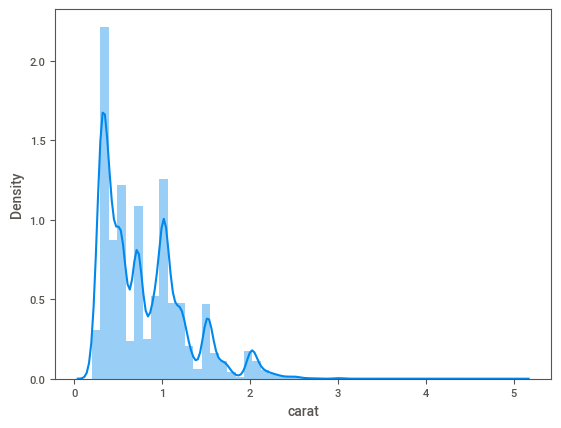

In [80]:
sns.distplot(diamonds['carat'])

C:\Users\leedab\AppData\Local\Temp\ipykernel_29528\21560536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds['depth'])


<Axes: xlabel='depth', ylabel='Density'>

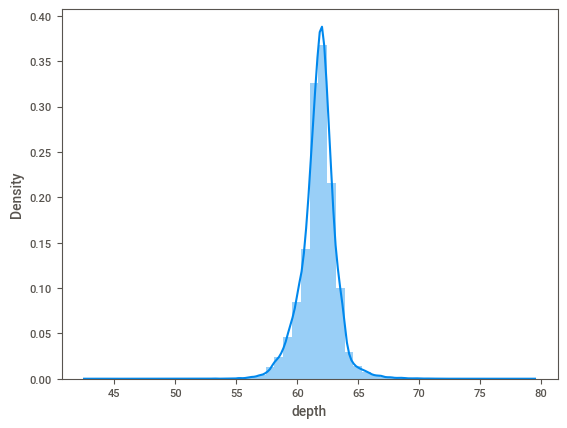

In [82]:
sns.distplot(diamonds['depth'])